# Análise das Stories

Notebook para o auxílio da análise das stories da Taís.


### Configurando jupyter

In [1]:
%matplotlib inline

import logging, io, json, warnings
logging.basicConfig(level="INFO")
warnings.filterwarnings('ignore')

def pprint(o):
    # small helper to make dict dumps a bit prettier
    print(json.dumps(o, indent=2))

In [2]:
# Checking versions
import rasa_nlu
import rasa_core

print("rasa_nlu: {} rasa_core: {}".format(rasa_nlu.__version__, rasa_core.__version__))


rasa_nlu: 0.13.7 rasa_core: 0.11.12


# Análise e Avaliação das Stories

### Gerando imagens de fluxo

Gerando os arquivos de imagem para a visualização e avaliação do fluxo das stories. A célula abaixo gera uma imagem para cada arquivo de stories. 
Para ver as imagens geradas acessa a pasta `img` deste notebook.

INFO:apscheduler.scheduler:Scheduler started
/usr/local/lib/python3.6/site-packages/pykwalify/core.py:99: UnsafeLoaderWarning: 
The default 'Loader' for 'load(stream)' without further arguments can be unsafe.
Use 'load(stream, Loader=ruamel.yaml.Loader)' explicitly if that is OK.
Alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel.yaml.error.UnsafeLoaderWarning)

In most other cases you should consider using 'safe_load(stream)'
  data = yaml.load(stream)
Processed Story Blocks: 100%|██████████| 29/29 [00:00<00:00, 337.72it/s, # trackers=1]


random


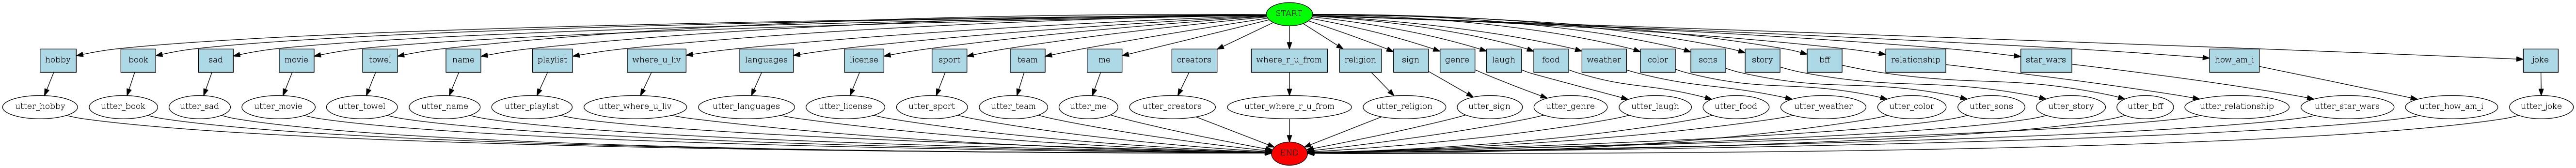

Processed Story Blocks: 100%|██████████| 45/45 [00:00<00:00, 303.86it/s, # trackers=1]


main


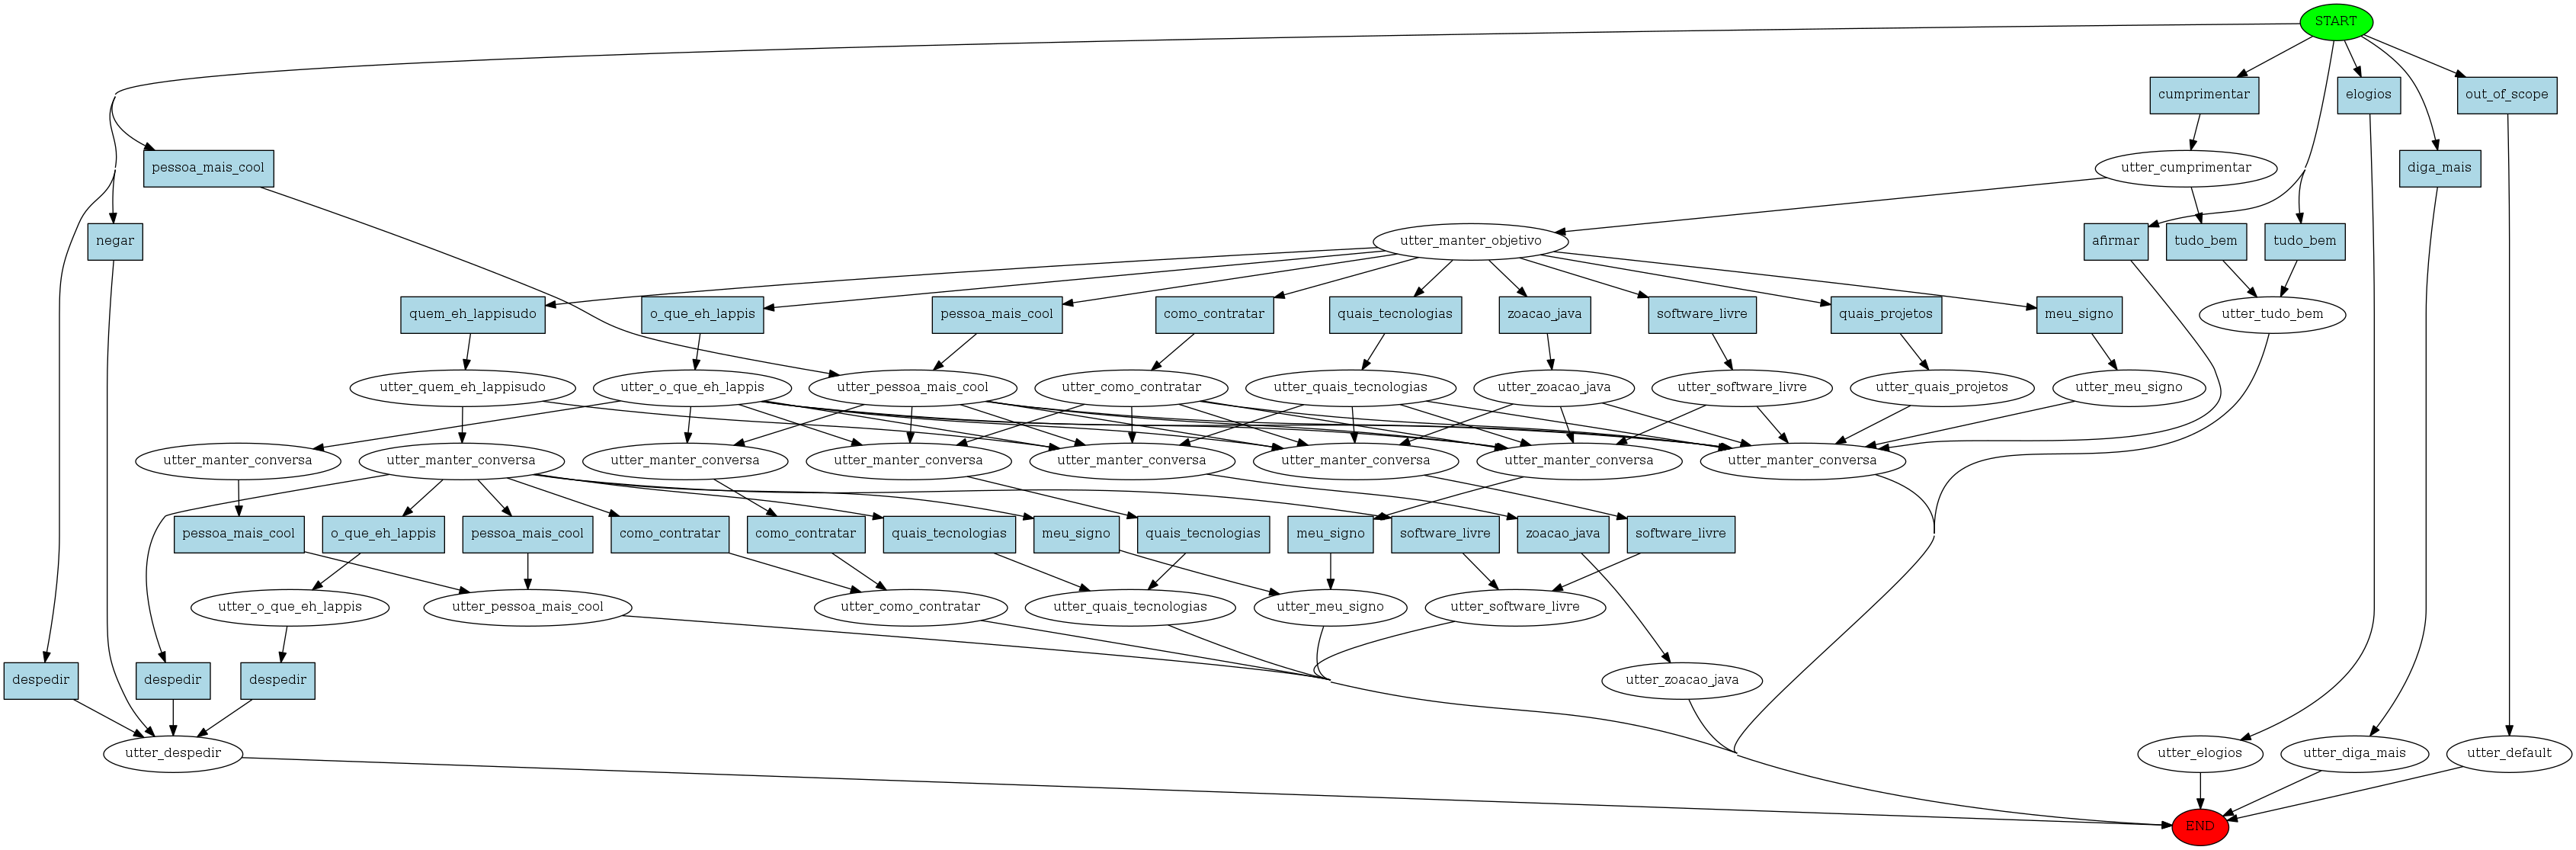

Processed Story Blocks: 100%|██████████| 16/16 [00:00<00:00, 237.57it/s, # trackers=1]


lappis


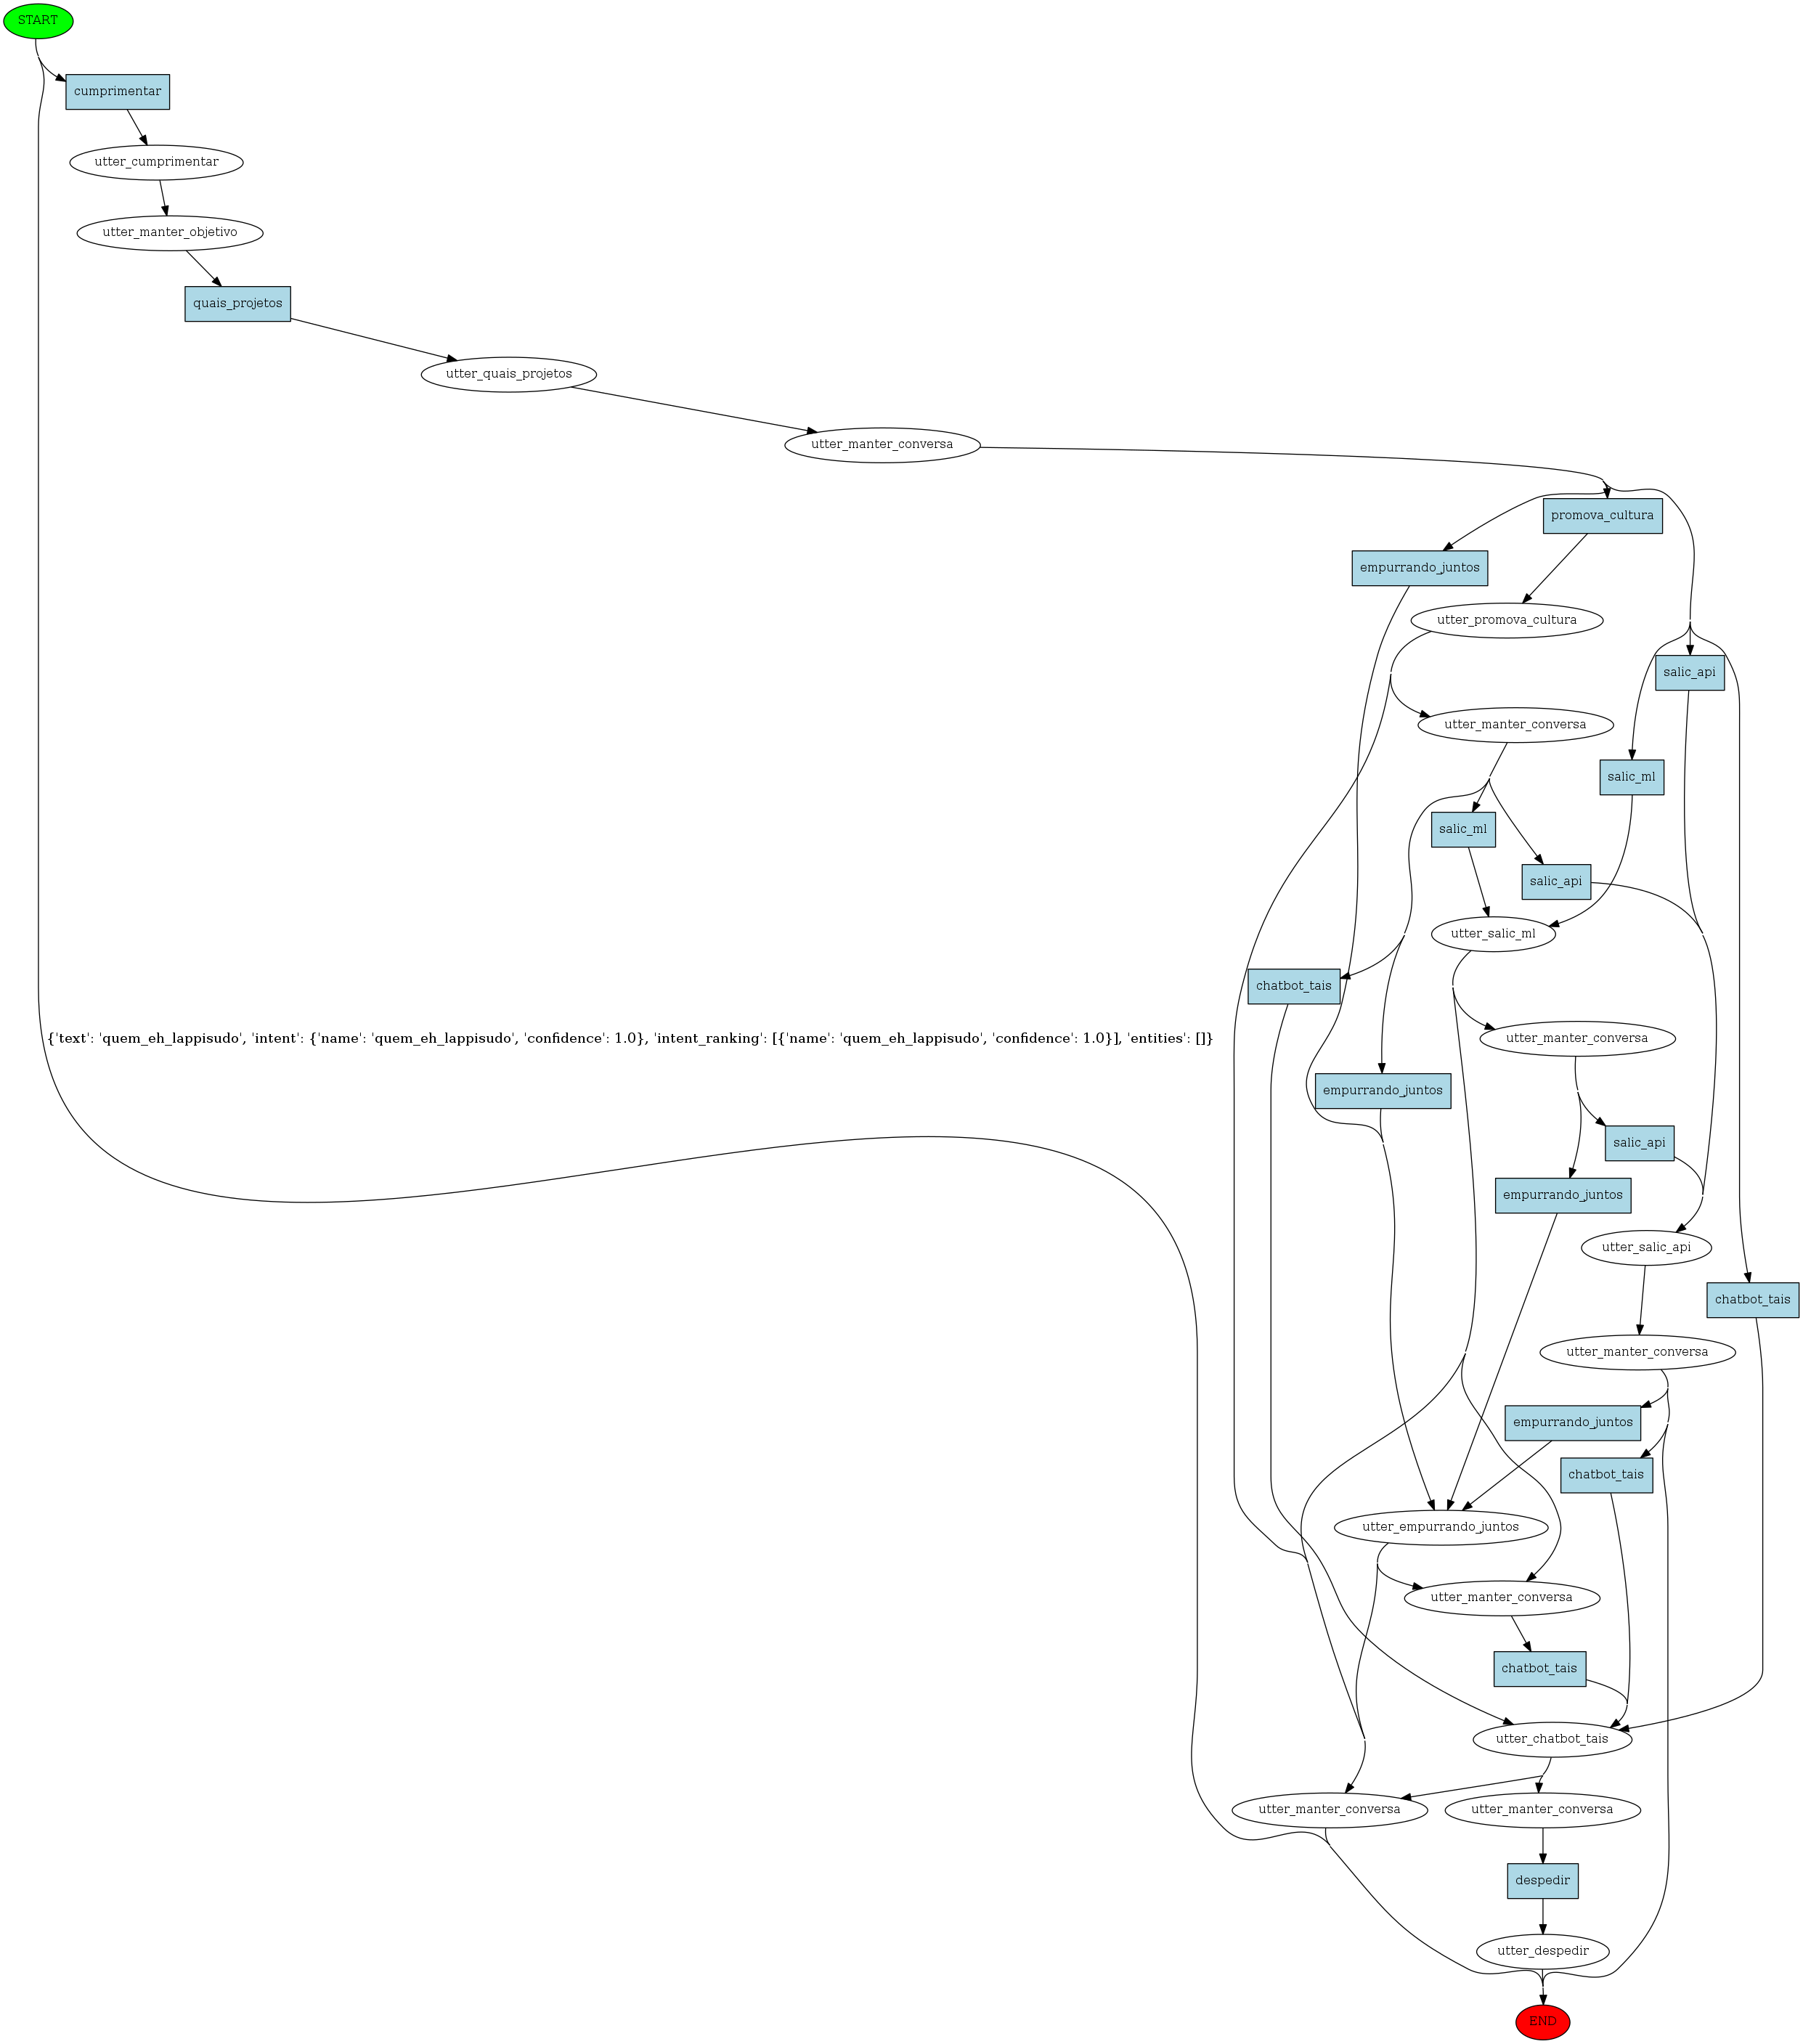

Imagens salvas


In [3]:
from IPython.display import Image
from rasa_core.agent import Agent

from os import listdir
from os.path import isfile, join


agent = Agent('../../bot/domain.yml')

# Adds all stories files in a list
stories_files = [f for f in listdir("../../bot/data/stories") if isfile(join("../../bot/data/stories", f))]

# Generate the image for each file
for file in stories_files:
    
    new_img_file = './img/story_graph_' + file[:-3] + '.png'
    
    agent.visualize('../../bot/data/stories/' + file,
                    new_img_file,
                    max_history = 2)
    
    print(file[:-3])
    display(Image('./img/story_graph_' + file[:-3] + '.png'))

print("Imagens salvas")

### Treinando as stories e gerando o gráfico

Na celula abaixo é feito o treinamento das stories e é gerado o gráfico da matriz de confusão para a avaliação das stories. Para melhor visualização, após rodar o código, abra o arquivo `story_eval.pdf` que será gerado e salvado na pasta `img` deste notebook.

In [4]:
from rasa_core.evaluate import run_story_evaluation
from rasa_core.policies import FallbackPolicy, KerasPolicy, MemoizationPolicy
from rasa_core.agent import Agent


## Treinando modelo de diálogo
agent = Agent('../../bot/domain.yml', policies=[MemoizationPolicy(), KerasPolicy()])

# loading our neatly defined training dialogues
training_data = agent.load_data('../../bot/data/stories')

agent.train(
    training_data,
    validation_split=0.0,
    epochs=10
)

## salvando em models/dialogue
agent.persist('models/dialogue')

Processed Story Blocks: 100%|██████████| 90/90 [00:01<00:00, 80.68it/s, # trackers=20]
Processed actions: 4635it [00:23, 193.83it/s, # examples=4533]
INFO:rasa_core.policies.keras_policy:Fitting model with 4635 total samples and a validation split of 0.0


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking (Masking)            (None, 5, 133)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 32)                21248     
_________________________________________________________________
dense (Dense)                (None, 54)                1782      
_________________________________________________________________
activation (Activation)      (None, 54)                0         
Total params: 23,030
Trainable params: 23,030
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
4635/4635 [==============================] - 3s 694us/step - loss: 3.1319 - acc: 0.4168
Epoch 2/10
4635/4635 [==============================] - 2s 449us/step - loss: 2.6020 - acc: 0.4436
Epoch 3/10
4635/4635 [==============================] - 2s 454us/step - 

INFO:rasa_core.policies.keras_policy:Done fitting keras policy model
INFO:rasa_core.agent:Persisted model to '/work/notebooks/stories/models/dialogue'


In [5]:
import sys
python = sys.executable
!{python} -m rasa_core.evaluate -d models/dialogue -s ../../bot/data/stories -o matrix.pdf --failed failed_stories.md

/usr/local/lib/python3.6/site-packages/pykwalify/core.py:99: UnsafeLoaderWarning: 
The default 'Loader' for 'load(stream)' without further arguments can be unsafe.
Use 'load(stream, Loader=ruamel.yaml.Loader)' explicitly if that is OK.
Alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel.yaml.error.UnsafeLoaderWarning)

In most other cases you should consider using 'safe_load(stream)'
  data = yaml.load(stream)
2019-01-23 12:11:34.038397: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
Processed Story Blocks: 100%|███| 90/90 [00:00<00:00, 4443.96it/s, # trackers=1]
INFO:__main__:Evaluating 90 stories
Progress:
100%|███████████████████████████████████████████| 90/90 [00:01<00:00, 73.90it/s]
INFO:__main__:Finished collecting predictions.
INFO:__main__:Evaluation Results on CONVERSATION level:
INFO:__main__:	Correct:   39 / 90
INFO:__ma

In [6]:
%cat failed_stories.md

## projeto 16
* cumprimentar
    - utter_cumprimentar
    - utter_manter_objetivo   <!-- predicted: action_listen -->
* quais_projetos
    - utter_quais_projetos
    - utter_manter_conversa
* empurrando_juntos
    - utter_empurrando_juntos
    - utter_manter_conversa
* chatbot_tais
    - utter_chatbot_tais
    - utter_manter_conversa


## projeto 10
* cumprimentar
    - utter_cumprimentar
    - utter_manter_objetivo   <!-- predicted: action_listen -->
* quais_projetos
    - utter_quais_projetos
    - utter_manter_conversa
* promova_cultura
    - utter_promova_cultura
    - utter_manter_conversa
* chatbot_tais
    - utter_chatbot_tais
    - utter_manter_conversa


## path 1
* cumprimentar
    - utter_cumprimentar
    - utter_manter_objetivo   <!-- predicted: action_listen -->
* quem_eh_lappisudo
    - utter_quem_eh_lappisudo
    - utter_manter_conversa
* despedir
    - utter_despedir


## path 8
* cumprimentar
    - utter_cumprimentar
    - utter_manter_objetivo   <!-- predicted: action